In [ ]:
from zipfile import ZipFile
file_name = "/content/website_classification.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('/content/website_classification.csv').sample(500, random_state=23)
data.head()

,cleaned_website_text,Category
314,faculty native studies search popular queries ...,Education
298,find jodi page find spam build fam shop women ...,E-Commerce
25,jp aerospace toggle navigation blog videos sto...,Business/Corporate
135,nykredit center database research nykredit cen...,Computers and Technology
1042,free chat room online registration free chat s...,Social Networking and Messaging


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['cleaned_website_text', 'Category']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,cleaned_website_text,Category
314,faculty native studies search popular queries ...,education
298,find jodi page find spam build fam shop women ...,ecommerce
25,jp aerospace toggle navigation blog videos sto...,businesscorporate
135,nykredit center database research nykredit cen...,computers technology
1042,free chat room online registration free chat s...,social networking messaging


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['cleaned_website_text', 'Category']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['faculty',
  'native',
  'studies',
  'search',
  'popular',
  'queries',
  'coming',
  'winter',
  'coming',
  'winter',
  'media',
  'levy',
  'fundraising',
  'goal',
  'surpass',
  'program',
  'pursue',
  'future',
  'give',
  'community',
  'land',
  'levy',
  'match',
  'donation',
  'university',
  'native',
  'studies',
  'faculty',
  'native',
  'studies',
  'ualberta',
  'newsletter',
  'events',
  'strynadka',
  'brady',
  'reading',
  'room',
  'faculty',
  'native',
  'studies',
  'contact',
  'information',
  'find',
  'person',
  'onecard',
  'bear',
  'tracks',
  'maps',
  'email',
  'apps',
  'eclass',
  'library',
  'faculty',
  'native',
  'studies',
  'menu',
  'home',
  'strategic',
  'plan',
  'mission',
  'native',
  'studies',
  'native',
  'studies',
  'contact',
  'news',
  'programs',
  'online',
  'course',
  'undergraduate',
  'program',
  'graduate',
  'program',
  'courses',
  'indigenous',
  'governance',
  'partnership',
  'program',
  'indigenous',


In [ ]:
model = word2vec.Word2Vec(corpus, size=3, window=20, min_count=20, workers=4)
model.wv['search']

array([-1.5651852 , -0.47023356,  0.6931204 ], dtype=float32)

In [ ]:
model.wv['project']

array([-1.10745895e+00, -2.07746699e-01,  1.02218911e-01,  1.66714960e-03,
       -3.53240728e-01,  1.33374095e-01,  2.15469375e-01, -1.90943584e-01,
       -9.97190997e-02,  2.35090703e-01,  4.23323810e-01, -8.36765766e-01,
       -4.52060878e-01,  5.69670461e-02, -3.19684714e-01,  3.44055802e-01,
        1.14761865e+00, -6.99963644e-02, -5.59161901e-01,  3.26459944e-01,
        9.99241710e-01, -5.20357847e-01, -3.02443653e-01,  1.06627159e-02,
       -1.05595917e-01,  6.91023096e-02, -4.80512857e-01, -4.24372494e-01,
        2.26792499e-01, -2.86048669e-02, -7.38617420e-01, -3.22376072e-01,
       -3.64478201e-01,  3.91275406e-01,  9.69772264e-02, -7.38011375e-02,
       -1.32132858e-01, -1.87195912e-01,  1.50686815e-01, -2.61553556e-01,
       -1.49171054e-01, -2.42295161e-01,  1.78962454e-01, -6.71307027e-01,
        1.81023151e-01,  6.66007400e-01,  1.27473339e-01, -1.85781121e-01,
        6.27710640e-01, -6.89668179e-01, -2.12821722e-01,  3.89219165e-01,
       -3.48223388e-01,  

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-10-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


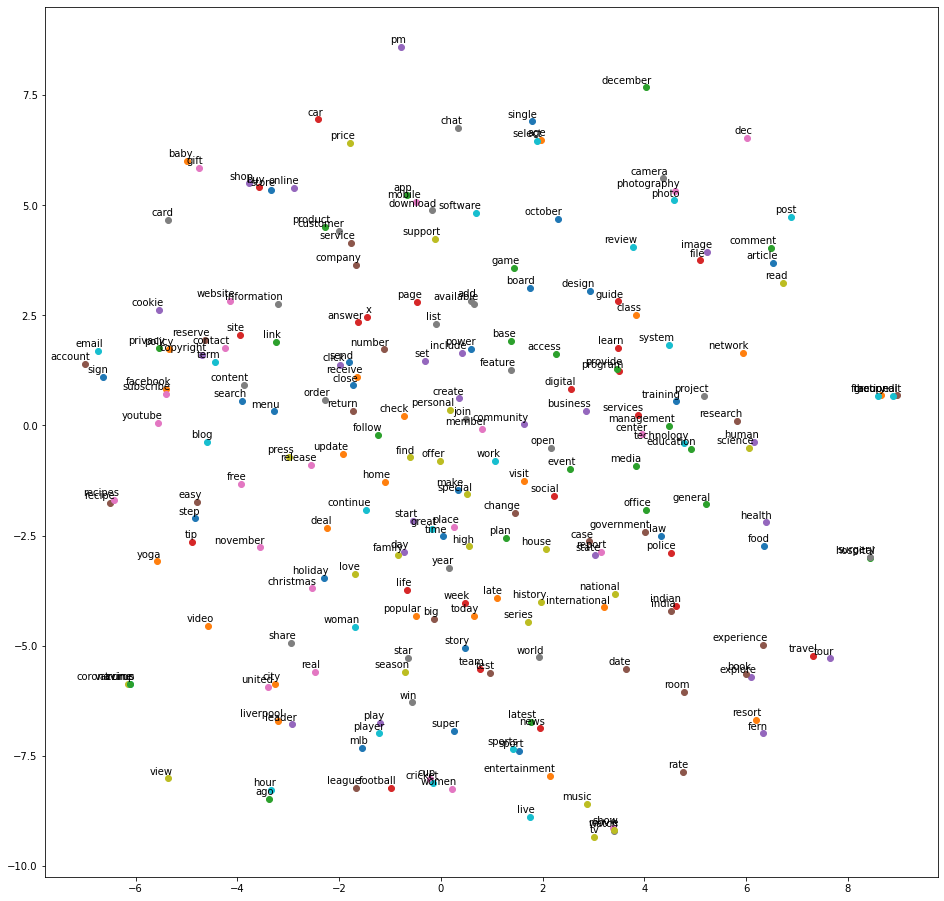

In [ ]:
tsne_plot(model)

<ipython-input-10-6af7c76e2364>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


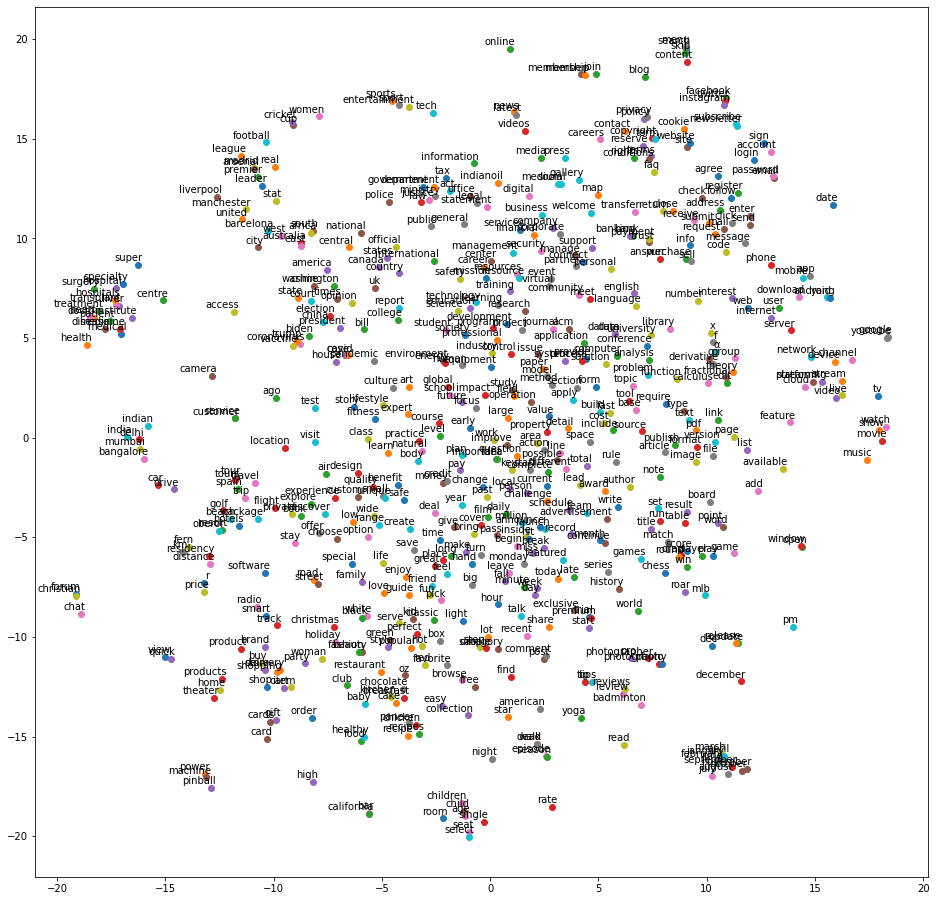

In [ ]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [ ]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [ ]:
model.most_similar('trump')